# Wage Analysis

### The purpose of this analysis is to study the level of income, education and other parameters of the interviewed group. The purpose of this analysis is to study the level of income, education and other parameters of the interviewed group.

import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import the dataframe and take a first look at it

In [3]:
df = pd.read_csv("C:\PytonDataSets\SLID.csv", encoding='utf-8')
df

,Unnamed: 0,wages,education,age,sex,language
0,1,10.56,15.0,40,Male,English
1,2,11.00,13.2,19,Male,English
2,3,NaN,16.0,49,Male,Other
3,4,17.76,14.0,46,Male,Other
4,5,NaN,8.0,71,Male,English
...,...,...,...,...,...,...
7420,7421,NaN,8.0,73,Male,Other
7421,7422,30.49,16.0,52,Male,Other
7422,7423,22.00,15.0,41,Male,Other
7423,7424,11.85,11.0,47,Female,English


It contains 7425 rows and 6 columns, but it can be observed that the first column is the indexes, so it is not informative and can be deleted

In [4]:
df = df.drop('Unnamed: 0', axis=1)

then you can view general information about the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wages      4147 non-null   float64
 1   education  7176 non-null   float64
 2   age        7425 non-null   int64  
 3   sex        7425 non-null   object 
 4   language   7304 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 290.2+ KB


you can immediately see that basically all the data is present almost in full, except for the salary data, there are quite a lot of missing values. For greater simplicity of further analysis, I will create specific age groups

In [79]:
def get_word_range(age):
    if age >= 10 and age <= 20:
        return '10-20'
    elif age > 20 and age <= 30:
        return '20-30'
    elif age > 30 and age <= 40:
        return '30-40'
    elif age > 40 and age <= 50:
        return '40-50'
    elif age > 50 and age <= 60:
        return '50-60'
    elif age > 60:
        return '60+'

df['age_range'] = df['age'].apply(get_word_range)
df

,wages,education,age,sex,language,age_range
0,10.56,15.0,40,Male,English,30-40
1,11.00,13.2,19,Male,English,10-20
2,NaN,16.0,49,Male,Other,40-50
3,17.76,14.0,46,Male,Other,40-50
4,NaN,8.0,71,Male,English,60+
...,...,...,...,...,...,...
7420,NaN,8.0,73,Male,Other,60+
7421,30.49,16.0,52,Male,Other,50-60
7422,22.00,15.0,41,Male,Other,40-50
7423,11.85,11.0,47,Female,English,40-50


# Wage analysis

Next, it is worth starting a direct analysis of wages. And it is worth starting with determining the share of missing values. This can be done in 3 ways:

In [80]:
nan = 0
integ = 0

for wage in df['wages']:
    if pd.isna(wage):
        nan += 1
    else:
        integ += 1
        
print('Percentage of missing values:', (nan/(integ+nan))*100)

Percentage of missing values: 44.148148148148145


In [81]:
all_wages = df['wages'].count()
nan = df['wages'].isna().sum()

print('Percentage of missing values:', (nan/(all_wages+nan))*100)

Percentage of missing values: 44.148148148148145


In [82]:
missing_percentage = df['wages'].isna().mean() * 100

print(f"Percentage of missing values in 'column_name': {missing_percentage:.2f}%")

Percentage of missing values in 'column_name': 44.15%


it can be observed that about 44% of the data are missing, which is quite significant

In [83]:
wage_df = df.dropna()
wage_df.reset_index()
wage_df = wage_df.drop(1)
wage_df

,wages,education,age,sex,language,age_range
0,10.56,15.0,40,Male,English,30-40
3,17.76,14.0,46,Male,Other,40-50
5,14.00,16.0,50,Female,English,40-50
8,8.20,15.0,31,Male,English,30-40
11,16.97,13.5,30,Female,English,20-30
...,...,...,...,...,...,...
7417,6.80,13.1,20,Male,English,10-20
7421,30.49,16.0,52,Male,Other,50-60
7422,22.00,15.0,41,Male,Other,40-50
7423,11.85,11.0,47,Female,English,40-50


then we will calculate the basic statistics for this dataframe

In [84]:
print('Mean: ', wage_df['wages'].mean())
print('Std: ', wage_df['wages'].std())
print('Max: ', wage_df['wages'].max())
print('Min: ', wage_df['wages'].min())

covar = wage_df['wages'].std()/wage_df['wages'].mean()

print('The coefficient of variation (%):', covar*100)

Mean:  15.5398921224285
Std:  7.869223867666416
Max:  49.92
Min:  2.3
The coefficient of variation (%): 50.638857758278


as you can see the average wage is about 15.5 dollars per hour, with a deviation of 7.9 dollars, and as the coefficient of variation shows, the data is quite significantly scattered, this is partially visible due to the maximum and minimum values. Let's try to find a correlation between the indicators in our dataframe

In [85]:
wage_df.corr(numeric_only=True)

,wages,education,age
wages,1.000000,0.305925,0.359467
education,0.305925,1.000000,-0.106326
age,0.359467,-0.106326,1.000000


No significant correlation was determined, only a minor indicator of the relationship between age and salary. It is worth building charts that will help you understand how the data in the "wages" column is distributed

Text(0.5, 0, 'Wage')

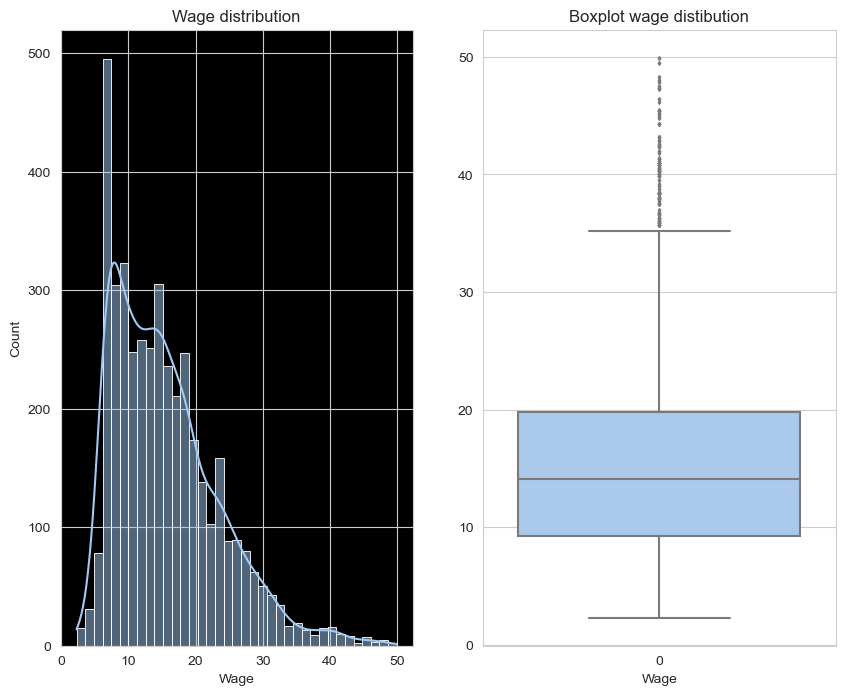

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))

sns.set_style("dark")

sns.histplot(df['wages'], kde=True, ax=ax1)
ax1.set_title('Wage distribution')
ax1.set_xlabel('Wage')
ax1.set_facecolor('black')

sns.boxplot(df['wages'], fliersize=2, ax=ax2)
ax2.set_title('Boxplot wage distibution')
ax2.set_xlabel('Wage')

in this case, we can observe a good distribution, but we also have quite a lot of outliers. It can even be observed that a lot of values were just below 15.5 dollars, while then there was a consistent decline

It is important to consider the distribution of wages among the main demographic groups

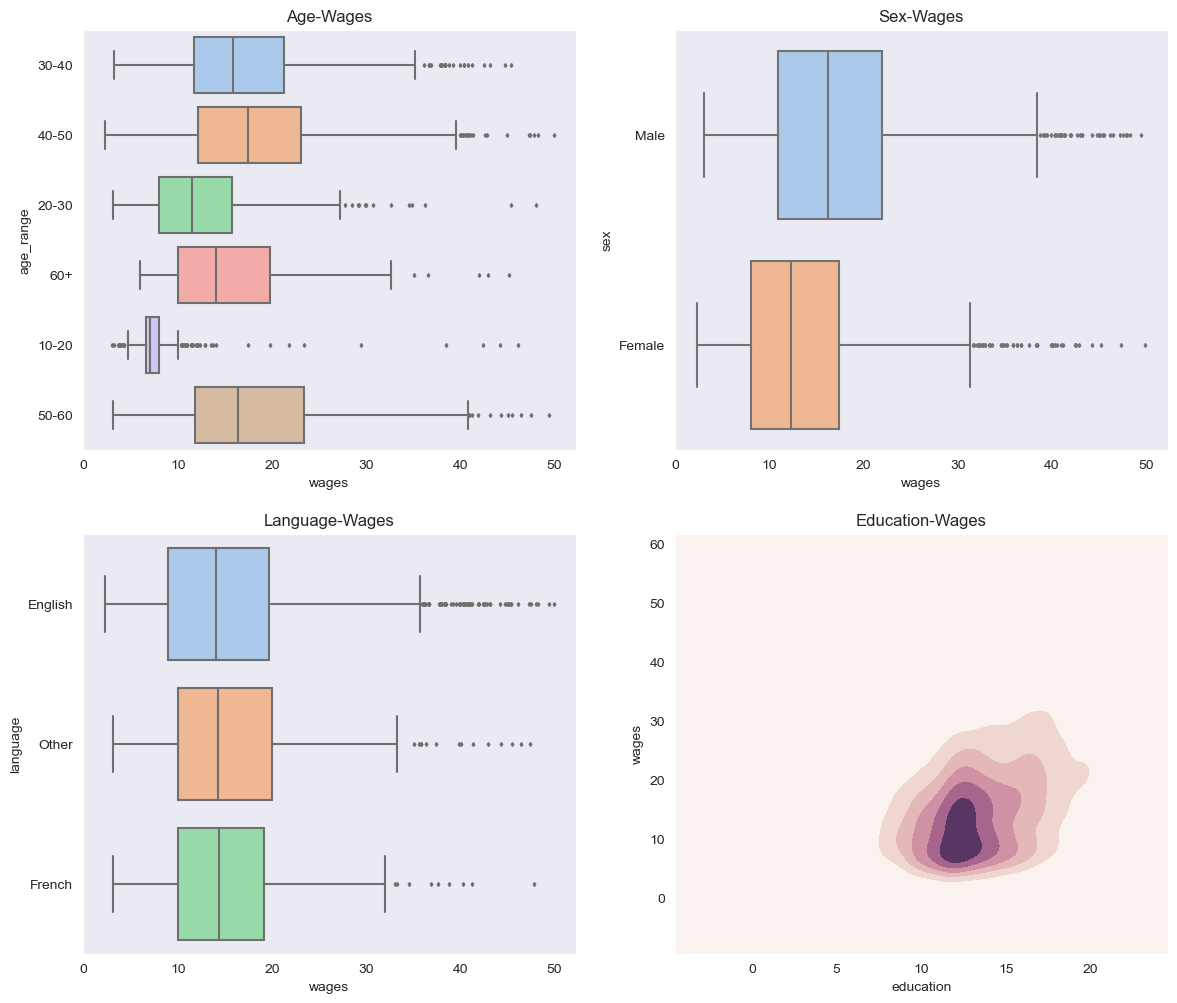

In [87]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(14, 12))

sns.set_style("whitegrid")

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.boxplot(data=wage_df, x="wages", y="age_range", fliersize=2, ax=ax1)
ax1.set_title('Age-Wages')

sns.boxplot(data=wage_df, x="wages", y="sex", fliersize=2, ax=ax2)
ax2.set_title('Sex-Wages')

sns.boxplot(data=wage_df, x="wages", y="language", fliersize=2, ax=ax3)
ax3.set_title('Language-Wages')

sns.kdeplot(data=wage_df, x="education", y='wages', cmap=cmap, fill=True,
        cut=6,
        thresh=0, levels=7,
        ax=ax4,)
ax4.set_title('Education-Wages')


sns.set_palette("pastel")

Conclusions:
- According to the age distribution, it can be observed that the highest wages are reached at the age of 40-50 years, this is generally the peak of career development, when experience, skills and a sufficient amount of energy are combined, then the latter declines, while before this age, there are not enough skills and experience
- According to the distribution by gender, the situation is quite simple, one can observe a much higher average salary for men.
- Among the language distribution, there are no significant results, in general, language has a very weak effect on wages in this case
- On the graph of the distribution by education, it can be observed that in general, yes, the level of education does affect the salary and the higher it is, the higher the salary on average, this is logical. The highest concentration of data is centered around 12-13 years of education and $5-15 per hour pay.

based on these findings, it is possible to examine the approximate highest paid group (men aged 40-50 with 15 + years of education) and can also be compared with the same group, but women

In [88]:
male_group = wage_df[(wage_df['age_range'] == '40-50') & (wage_df['sex'] == 'Male') & (wage_df['education'] >= 15)]

print(male_group['wages'].mean())
print(male_group['wages'].std())
print(len(male_group['wages']))

24.60608695652174
8.625760848608733
161


it can be seen that the average salary is more than one standard deviation higher than the average for all data, while there are as many as 161 people in this group, the dispersion in this group is also higher than for all data

Text(0.5, 1.0, 'High payed male group')

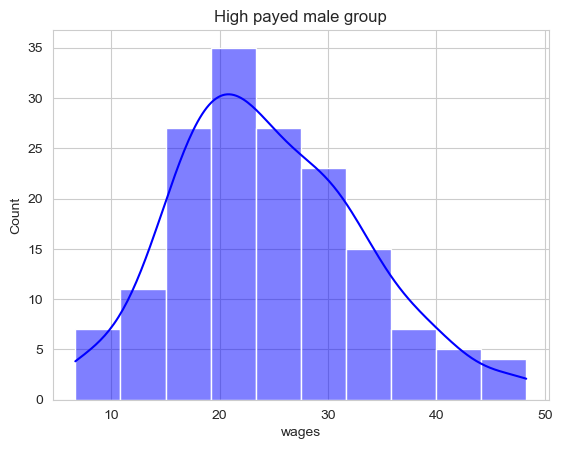

In [89]:
sns.histplot(male_group['wages'], kde=True, color='blue')
plt.title('High payed male group')

we form a women's group in the same way

In [90]:
female_group = wage_df[(wage_df['age_range'] == '40-50') & (wage_df['sex'] == 'Female') & (wage_df['education'] >= 15)]

print(female_group['wages'].mean())
print(female_group['wages'].std())
print(len(female_group['wages']))

22.28548148148148
9.265638794300456
135


you can also observe a similar situation in terms of the growth of the average salary, but here there is less data (although there are more women in the data frame), more dispersion and a lower average value.

Text(0.5, 1.0, 'High payed female group')

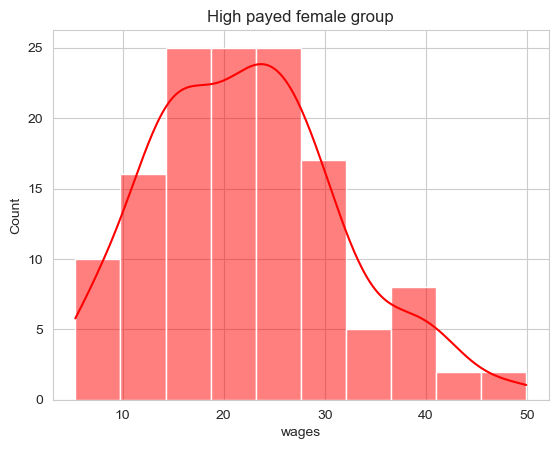

In [73]:
sns.histplot(female_group['wages'], kde=True, color='red')
plt.title('High payed female group')

both graphs of the distribution of wages among these groups resemble a normal distribution

# Age Analysis

it is also possible to analyze the age distribution of our data

<Axes: xlabel='age', ylabel='Count'>

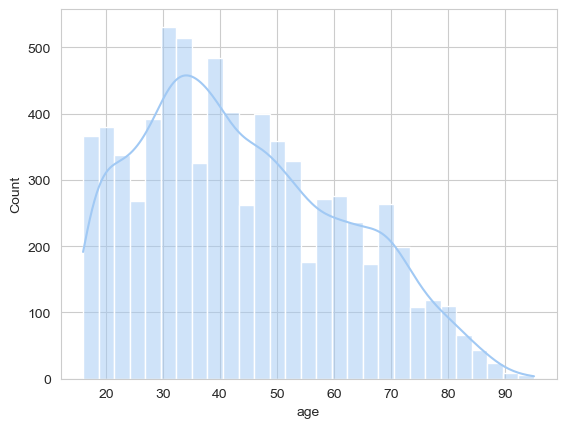

In [74]:
sns.histplot(df['age'], kde=True)

the following visualization reflects the education of age groups in absolute terms, but here the situation is interesting. It would seem that the older the age, the more years of study there could be, but this is not entirely true. The graph shows that the average level of education in the 20-30 group is higher than in all other groups, and the oldest group, on the contrary, has the lowest level. This may be related to two points:
1) The older generation will not be as educated as the current generation
2) Almost no one learns all his life and therefore it makes no sense to compare older and younger age groups

<Axes: xlabel='language', ylabel='age'>

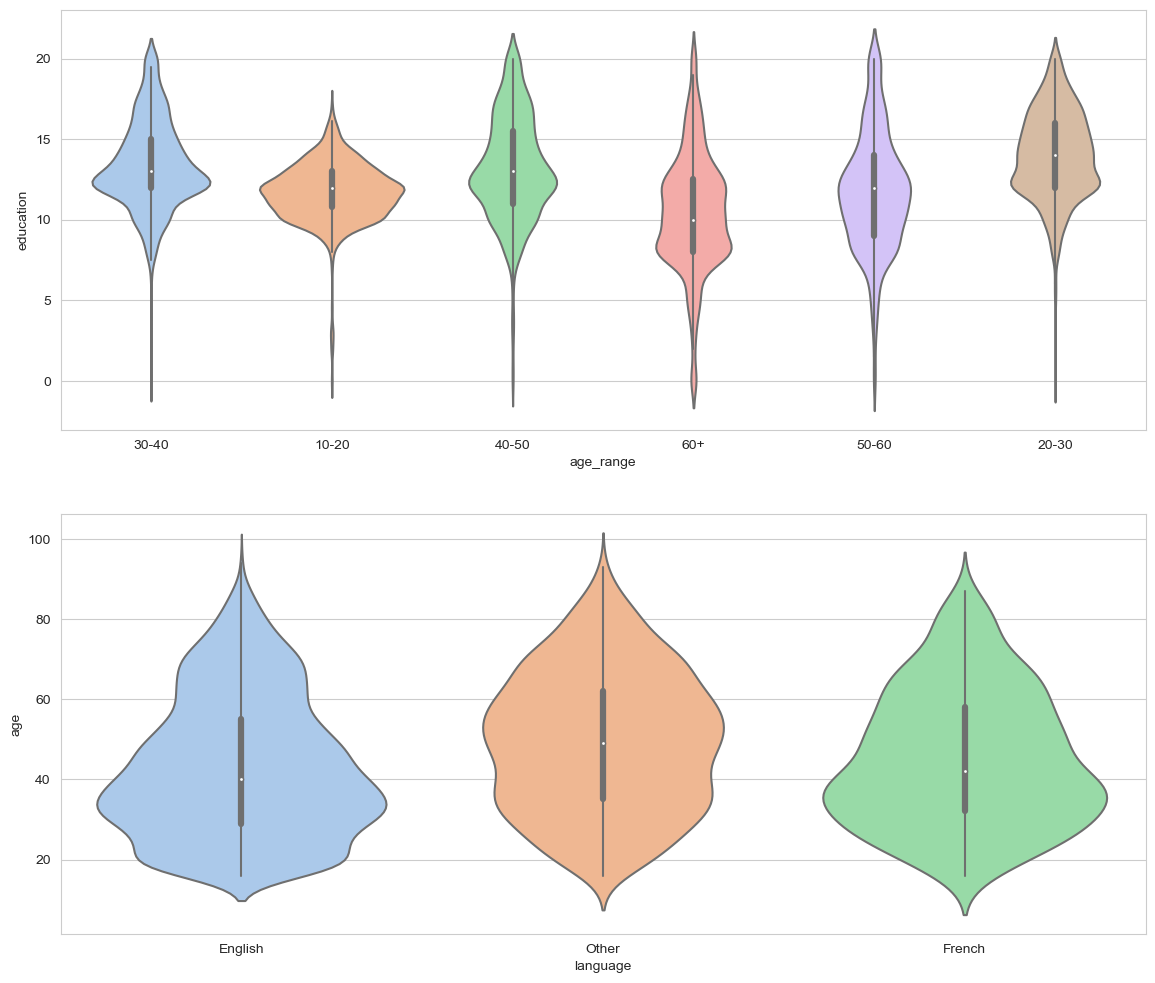

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 12))

sns.violinplot(data=df, y="education", x="age_range", fliersize=2, ax=ax1)

sns.violinplot(data=df, y="age", x="language", fliersize=2, ax=ax2)

In [99]:
lis = []
for i in df['age_range']:
    if i not in lis:
        lis.append(i)
    else:
        continue

means = {}

for i in lis:
    means[i] = df[df['age_range'] == i]['education'].mean()
    
print("average years of education of the age group:", means)

average years of education of the age group: {'30-40': 13.398659354052405, '10-20': 11.674958263772956, '40-50': 13.2, '60+': 10.480213903743316, '50-60': 11.737474120082817, '20-30': 14.0268074735987}


# Sex Analysis

As mentioned earlier, we have slightly more data on women than on men

<Axes: xlabel='sex', ylabel='count'>

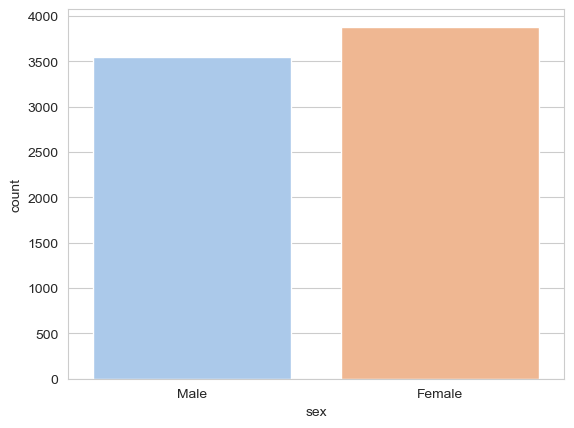

In [77]:
sns.countplot(x = df['sex'])

Next, we will consider whether the level of education of men and women in our data differs, as well as what languages are spoken by these groups

Text(0.5, 1.0, 'Female')

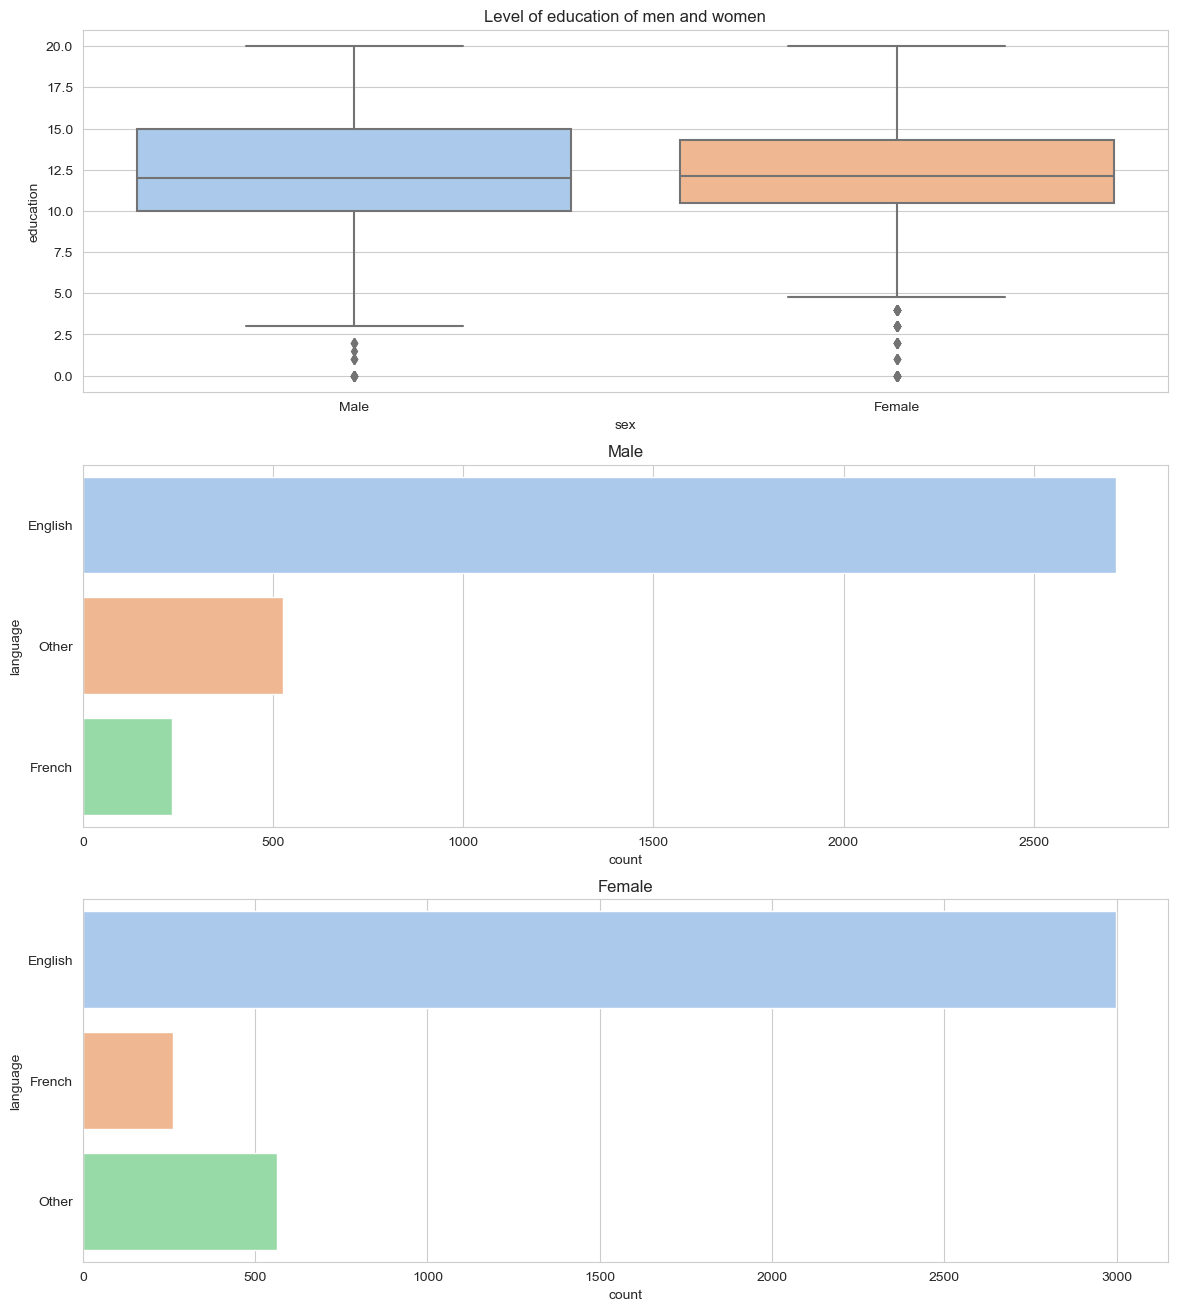

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(14, 16))

male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

sns.boxplot(data=df, y="education", x="sex", ax=ax1)
ax1.set_title('Level of education of men and women')

sns.countplot(data=male_data, y="language", ax=ax2)
ax2.set_title('Male')

sns.countplot(data=female_data, y="language", ax=ax3)
ax3.set_title('Female')

in general, there is almost no difference in terms of language, in terms of education there are small differences, but if we talk about the average value, it will be approximately the same